In [2]:
from tensorflow import keras 
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


**Descargando base de datos.**


---



In [3]:
 ! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gabriel7171","key":"7d9e641b55b9db970a2f17ec23af7bb9"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d asiedubrempong/minerals-identification-dataset

 97% 223M/230M [00:02<00:00, 110MB/s]
100% 230M/230M [00:02<00:00, 87.0MB/s]


In [6]:
!unzip -qq minerals-identification-dataset.zip

**Copiando los datos para test, train y validation**


---



In [7]:
import os, shutil, pathlib

In [8]:
p = pathlib.Path('.') / "minet"
for folder in p.iterdir():
  if folder.is_dir():
    count = 1
    for file in folder.iterdir():
      if file.is_file():
        new_file = folder.name + str(count) + ".jpg"
        file.rename(p / folder.name / new_file)
        count += 1
        


In [9]:
original_dir= pathlib.Path("minet")
new_base_dir= pathlib.Path("data_base")

def make_subset(subset_name):
  for c in ("biotite", "bornite", "malachite", "quartz"):
    dir = new_base_dir / subset_name / c
    os.makedirs(dir, exist_ok= True)
    


In [10]:
make_subset("train")
make_subset("validation")
make_subset("test")


In [11]:
destination = pathlib.Path("data_base/train/biotite")
file_name = [f"biotite{i}.jpg" for i in range  (1,40)]
try:
  for name in file_name:
    shutil.copy(f"minet/biotite/{name}", destination)
except FileNotFoundError:
   pass
   ##############################################
destination = pathlib.Path("data_base/train/bornite")
file_name = [f"bornite{i}.jpg" for i in range  (1,103)]
try:
  for name in file_name:
    shutil.copy(f"minet/bornite/{name}", destination)
except FileNotFoundError:
   pass
   ##############################################
destination = pathlib.Path("data_base/train/malachite")
file_name = [f"malachite{i}.jpg" for i in range  (1,141)]
try:
  for name in file_name:
    shutil.copy(f"minet/malachite/{name}", destination)
except FileNotFoundError:
   pass
   ##############################################
destination = pathlib.Path("data_base/train/quartz")
file_name = [f"quartz{i}.jpg" for i in range  (1,85)]
try:
  for name in file_name:
    shutil.copy(f"minet/quartz/{name}", destination)
except FileNotFoundError:
   pass


destination = pathlib.Path("data_base/test/biotite")
file_name = [f"biotite{i}.jpg" for i in range  (40,53)]
try:
  for name in file_name:
    shutil.copy(f"minet/biotite/{name}", destination)
except FileNotFoundError:
   pass
   ##############################################
destination = pathlib.Path("data_base/test/bornite")
file_name = [f"bornite{i}.jpg" for i in range  (103,137)]
try:
  for name in file_name:
    shutil.copy(f"minet/bornite/{name}", destination)
except FileNotFoundError:
   pass
   ##############################################
destination = pathlib.Path("data_base/test/malachite")
file_name = [f"malachite{i}.jpg" for i in range  (141,188)]
try:
  for name in file_name:
    shutil.copy(f"minet/malachite/{name}", destination)
except FileNotFoundError:
   pass
   ##############################################
destination = pathlib.Path("data_base/test/quartz")
file_name = [f"quartz{i}.jpg" for i in range  (85,114)]
try:
  for name in file_name:
    shutil.copy(f"minet/quartz/{name}", destination)
except FileNotFoundError:
   pass   



destination = pathlib.Path("data_base/validation/biotite")
file_name = [f"biotite{i}.jpg" for i in range  (53,68)]
try:
  for name in file_name:
    shutil.copy(f"minet/biotite/{name}", destination)
except FileNotFoundError:
   pass
   ##############################################
destination = pathlib.Path("data_base/validation/bornite")
file_name = [f"bornite{i}.jpg" for i in range  (137,173)]
try:
  for name in file_name:
    shutil.copy(f"minet/bornite/{name}", destination)
except FileNotFoundError:
   pass
   ##############################################
destination = pathlib.Path("data_base/validation/malachite")
file_name = [f"malachite{i}.jpg" for i in range  (188,236)]
try:
  for name in file_name:
    shutil.copy(f"minet/malachite/{name}", destination)
except FileNotFoundError:
   pass
   ##############################################
destination = pathlib.Path("data_base/validation/quartz")
file_name = [f"quartz{i}.jpg" for i in range  (114,143)]
try:
  for name in file_name:
    shutil.copy(f"minet/quartz/{name}", destination)
except FileNotFoundError:
   pass     

**Preparando modelo pre-entrenado (VGG16)**

---



In [12]:
conv_base = keras.applications.vgg16.VGG16(weights = "imagenet", include_top=False, input_shape=(180,180,3), classes=4)

58900480/58889256 [==============================] - 1s 0us/step


In [13]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**Preprocesamiento de datos.**


---



In [14]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(new_base_dir / "train", image_size = (180,180), batch_size = 32)
validation_dataset = image_dataset_from_directory(new_base_dir / "validation", image_size = (180,180), batch_size = 32)
test_dataset = image_dataset_from_directory(new_base_dir / "test", image_size = (180,180), batch_size = 32)

Found 365 files belonging to 4 classes.
Found 128 files belonging to 4 classes.
Found 123 files belonging to 4 classes.


**Feature Extraction**


---



In [15]:
def get_features_and_labels(dataset):
  all_features= []
  all_labels= []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)  


In [16]:
train_features.shape

(365, 5, 5, 512)

**Entrenamiento del modelo densamente conectado**


---



In [22]:
inputs = keras.Input(shape=(5,5,512))
x= layers.Flatten()(inputs)
x= layers.Dense(256)(x)
x= layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=["accuracy"])
callbacks= [keras.callbacks.ModelCheckpoint(filepath="feature_extraction.keras",save_best_only=True, monitor= "val_loss")]
history= model.fit(train_features, train_labels, epochs=20, validation_data= (val_features, val_labels), callbacks=callbacks)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 2s 65ms/step - loss: 28.0049 - accuracy: 0.7014 - val_loss: 20.5479 - val_accuracy: 0.7500
Epoch 2/20
12/12 [==============================] - 0s 33ms/step - loss: 10.0895 - accuracy: 0.8877 - val_loss: 25.6292 - val_accuracy: 0.8359
Epoch 3/20
12/12 [==============================] - 1s 44ms/step - loss: 3.1085 - accuracy: 0.9589 - val_loss: 13.2786 - val_accuracy: 0.8359
Epoch 4/20
12/12 [==============================] - 1s 50ms/step - loss: 1.3937 - accuracy: 0.9753 - val_loss: 11.7699 - val_accuracy: 0.8984
Epoch 5/20
12/12 [==============================] - 1s 43ms/step - loss: 0.7575 - accuracy: 0.9836 - val_loss: 11.4386 - val_accuracy: 0.9062
Epoch 6/20
12/12 [==============================] - 1s 45ms/step - loss: 0.7825 - accuracy: 0.9836 - val_loss: 9.5364 - val_accuracy: 0.8906
Epoch 7/20
12/12 [==============================] - 0s 32ms/step - loss: 0.2507 - accuracy: 0.9945 - val_loss: 12.2960 - val_accuracy: 0.8984
Epoch 8/20
12/12

**Evaluación del modelo en el conjunto de prueba**


---



In [23]:
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 0s 15ms/step - loss: 6.4913 - accuracy: 0.9187
Test accuracy: 0.919


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


**Gráficos de resultados**


---



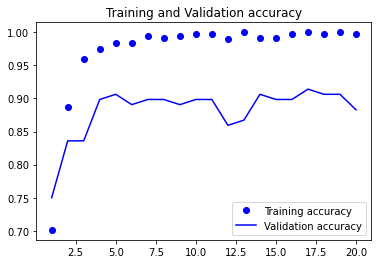

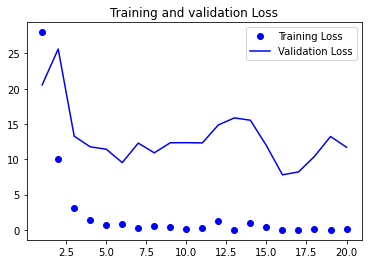

In [24]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label= "Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label= "Training Loss")
plt.plot(epochs, val_loss, "b", label= "Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

**Implementación del modelo pre-entrenado con *Data Augmentation***


---

 

In [27]:

conv_base = keras.applications.vgg16.VGG16(weights = "imagenet", include_top = False)
conv_base.trainable= False

In [30]:
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2),
     ]
)
inputs = keras.Input(shape= (180,180,3))
x= data_augmentation(inputs)
x= keras.applications.vgg16.preprocess_input(x)
x= conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=["accuracy"])

In [31]:
callbacks= [keras.callbacks.ModelCheckpoint(filepath="feature_extraction_with_data_augmentation.keras",save_best_only=True, monitor= "val_loss")]
history= model.fit(train_dataset, epochs=50, validation_data= validation_dataset, callbacks=callbacks)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 185s 15s/step - loss: 15.7780 - accuracy: 0.7096 - val_loss: 12.7555 - val_accuracy: 0.8438
Epoch 2/50
12/12 [==============================] - 164s 14s/step - loss: 9.5696 - accuracy: 0.8877 - val_loss: 15.9593 - val_accuracy: 0.8750
Epoch 3/50
12/12 [==============================] - 174s 15s/step - loss: 9.4514 - accuracy: 0.8904 - val_loss: 10.7473 - val_accuracy: 0.9062
Epoch 4/50
12/12 [==============================] - 170s 14s/step - loss: 3.7066 - accuracy: 0.9288 - val_loss: 11.2530 - val_accuracy: 0.8672
Epoch 5/50
12/12 [==============================] - 163s 14s/step - loss: 5.2446 - accuracy: 0.9370 - val_loss: 11.0982 - val_accuracy: 0.8750
Epoch 6/50
12/12 [==============================] - 164s 14s/step - loss: 2.0883 - accuracy: 0.9699 - val_loss: 12.5467 - val_accuracy: 0.9062
Epoch 7/50
12/12 [==============================] - 185s 16s/step - loss: 1.9631 - accuracy: 0.9781 - val_loss: 15.5945 - val_accuracy: 0.8906
Epoch 8/5

In [32]:
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


4/4 [==============================] - 42s 10s/step - loss: 9.7341 - accuracy: 0.9350
Test accuracy: 0.935


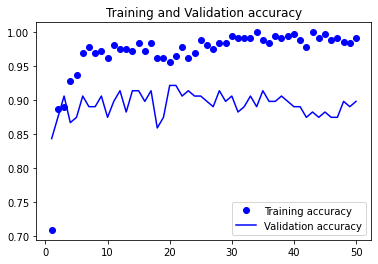

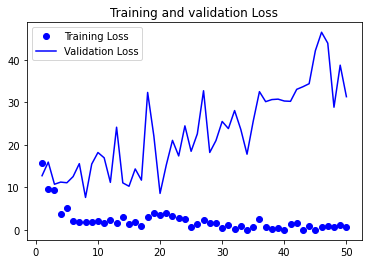

In [33]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label= "Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label= "Training Loss")
plt.plot(epochs, val_loss, "b", label= "Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

**Implementación del modelo pre-entrenado con *Fine Tunning***


---

 


In [34]:
 conv_base.trainable = True
 for layer in conv_base.layers[:-4]:
   layer.trainable = False

In [39]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),metrics=["accuracy"]  )
callbacks=[keras.callbacks.ModelCheckpoint(filepath = "fine_tuning.keras",save_best_only=True, monitor = "val_loss")]
history= model.fit(train_dataset, epochs = 30 , validation_data = validation_dataset, callbacks = callbacks)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 190s 16s/step - loss: 1.1151 - accuracy: 0.9890 - val_loss: 34.8982 - val_accuracy: 0.8906
Epoch 2/30
12/12 [==============================] - 188s 16s/step - loss: 0.1264 - accuracy: 0.9945 - val_loss: 38.9835 - val_accuracy: 0.8672
Epoch 3/30
12/12 [==============================] - 192s 16s/step - loss: 0.2000 - accuracy: 0.9945 - val_loss: 35.1356 - val_accuracy: 0.8906
Epoch 4/30
12/12 [==============================] - 190s 16s/step - loss: 0.0930 - accuracy: 0.9945 - val_loss: 32.0225 - val_accuracy: 0.8984
Epoch 5/30
12/12 [==============================] - 189s 16s/step - loss: 0.2737 - accuracy: 0.9918 - val_loss: 29.9293 - val_accuracy: 0.8984
Epoch 6/30
12/12 [==============================] - 192s 16s/step - loss: 0.2398 - accuracy: 0.9945 - val_loss: 31.0241 - val_accuracy: 0.8984
Epoch 7/30
12/12 [==============================] - 189s 16s/step - loss: 0.0224 - accuracy: 0.9973 - val_loss: 32.6169 - val_accuracy: 0.8906
Epoch 8/30

In [40]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


4/4 [==============================] - 41s 10s/step - loss: 10.9087 - accuracy: 0.9268
Test accuracy: 0.927


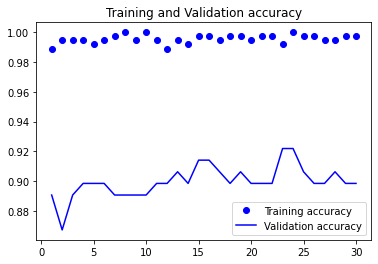

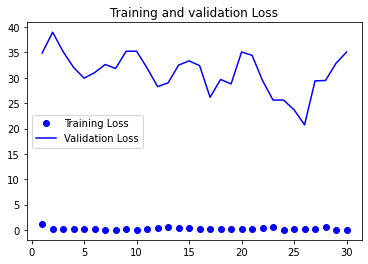

In [41]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label= "Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label= "Training Loss")
plt.plot(epochs, val_loss, "b", label= "Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()